## Handwritten digit recognition

### This project is a classic example of computer vision and machine learning. It involves creating a system that can accurately recognize and classify handwritten digits (usually from 0 to 9) into their respective categories. This project has various real-world applications, such as digitizing postal codes on envelopes, recognizing handwritten numbers on checks, and assisting in the automation of form processing.

### Importing header files

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np 

### Reading the MNIST dataset

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

### 28 X 28 pixel 

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

### 0 represents black area and the numbers represent the white area or the pixel where the number is written

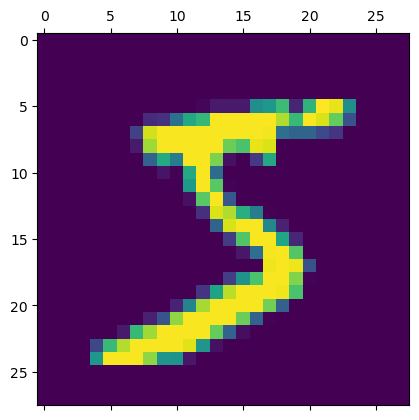

In [9]:
plt.matshow(X_train[0])

In [10]:
y_train[0]

5

In [17]:
X_train=X_train/255
X_test=X_test/255

### division is done to get the values in range 0-1
### This will increase the accuracy as the scaled model would give better accuracy

In [18]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [19]:
X_train.shape

(60000, 28, 28)

### 6000 is the no. of images and next two dimension i.e 28x28 pixel of an image

In [20]:
X_train_flat=X_train.reshape(len(X_train),28*28)
X_train_flat.shape

(60000, 784)

In [21]:
X_test_flat=X_test.reshape(len(X_test),28*28)
X_test_flat.shape

(10000, 784)

### Creating neural network

In [22]:
model=keras.Sequential([keras.layers.Dense
            (10,input_shape=(784,),activation='sigmoid')])

#10 is used for the 10 digits
# the above line is used for creating a neural network model
# keras.layers.Dense(10, ...)  adds a dense (fully connected) layer to the model with 10 output neurons
#input_shape=(784,) Specifies the shape of the input data expected 

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train_flat,y_train,epochs=5)
#epochs 5 represent the no. of times the model will go through the entire training dataset

Epoch 1/5
1875/1875 [==============================] - 2s 955us/step - loss: 0.4715 - accuracy: 0.8758
Epoch 2/5
1875/1875 [==============================] - 1s 793us/step - loss: 0.3037 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 1s 796us/step - loss: 0.2837 - accuracy: 0.9212
Epoch 4/5
1875/1875 [==============================] - 2s 911us/step - loss: 0.2733 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 2s 937us/step - loss: 0.2667 - accuracy: 0.9261


### evaluating accuracy on test dataset

In [23]:
model.evaluate(X_test_flat,y_test)

313/313 [==============================] - 0s 786us/step - loss: 0.2697 - accuracy: 0.9233


[0.2697378098964691, 0.92330002784729]

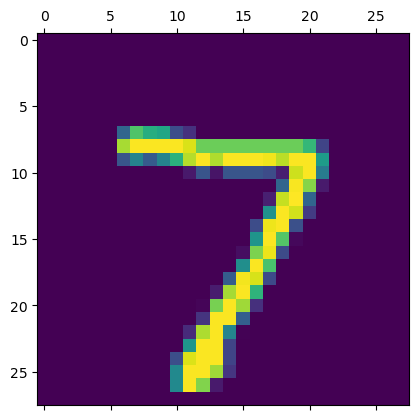

In [24]:
plt.matshow(X_test[0])

In [27]:
y_pred=model.predict(X_test_flat)

313/313 [==============================] - 0s 755us/step


In [28]:
y_pred[0]

array([1.9519083e-02, 2.9162464e-07, 5.1451694e-02, 9.4841897e-01,
       1.2901330e-03, 9.8902792e-02, 2.0204905e-06, 9.9977720e-01,
       7.5456172e-02, 5.9983557e-01], dtype=float32)

In [29]:
np.argmax(y_pred[0])

7

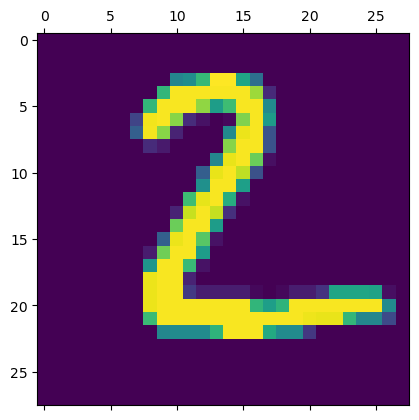

In [31]:
plt.matshow(X_test[1])

In [32]:
np.argmax(y_pred[1])

2

In [34]:
y_pred_label=[np.argmax(i) for i in y_pred]
y_pred_label[:5]

[7, 2, 1, 0, 4]

In [33]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [38]:
c_matrix=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_label)
print(c_matrix)

tf.Tensor(
[[ 961    0    2    2    0    6    6    2    1    0]
 [   0 1118    3    2    0    1    4    2    5    0]
 [   6   11  920   19    8    4   13   10   36    5]
 [   2    0   20  935    0   20    2   10   13    8]
 [   2    2    7    2  896    0   12    4    8   49]
 [   9    2    2   38    7  783   16    6   23    6]
 [   9    3    6    1    7   14  915    2    1    0]
 [   1    8   22    9    5    0    0  950    1   32]
 [   7   15    7   36    8   38   10   12  834    7]
 [  11    7    1   11   20   10    0   25    3  921]], shape=(10, 10), dtype=int32)


Text(70.72222222222221, 0.5, 'Truth')

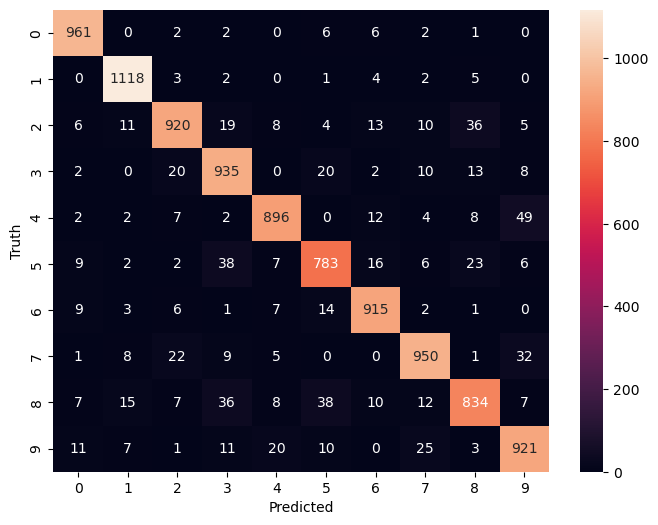

In [40]:
import seaborn as sn
plt.figure(figsize=(8,6))
sn.heatmap(c_matrix,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### 961 times the no. 0 was predicted correctly
### 1118 times the no. 1 was predicted correctly
### 920 times the no. 2 was predicted correctly
### 935 times the no. 3 was predicted correctly
### 896 times the no. 4 was predicted correctly
### 783 times the no. 5 was predicted correctly
### 915 times the no. 6 was predicted correctly
### 950 times the no. 7 was predicted correctly
### 834 times the no. 8 was predicted correctly
### 921 times the no. 9 was predicted correctly

## Adding hidden layer to increase the accuracy

In [45]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'), 
    keras.layers.Dense(10,activation='sigmoid')]) 
#hidden layer
# first layer
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train_flat,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2662 - accuracy: 0.9247
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1185 - accuracy: 0.9656
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0823 - accuracy: 0.9751
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0634 - accuracy: 0.9806
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0488 - accuracy: 0.9851


In [46]:
model.evaluate(X_test_flat,y_test)

313/313 [==============================] - 0s 956us/step - loss: 0.0964 - accuracy: 0.9703


[0.09639836847782135, 0.970300018787384]

Text(70.72222222222221, 0.5, 'Truth')

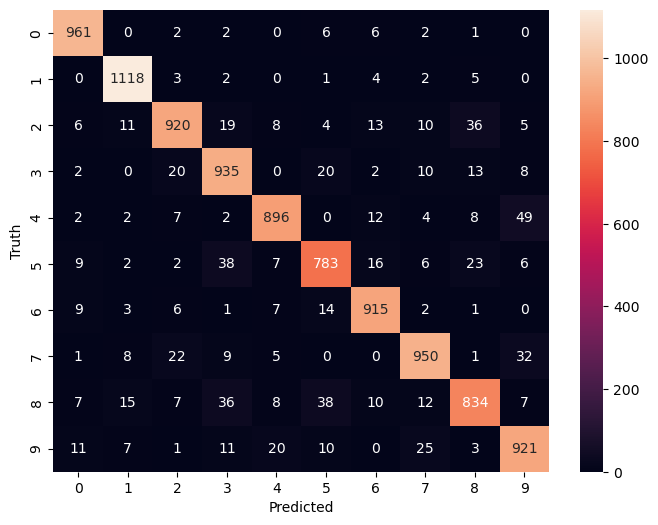

In [47]:
import seaborn as sn
plt.figure(figsize=(8,6))
sn.heatmap(c_matrix,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### By scaling the X_train, we can get more accurate results.